<a href="https://colab.research.google.com/github/imaginaryBuddy/imdbMoviesDSAI/blob/main/answeringInterestingQues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as no 
import matplotlib.pyplot as plt 
import seaborn as sb

In [34]:
from IPython import display

In [5]:
# importing the dataset for analysis 

url = "https://raw.githubusercontent.com/imaginaryBuddy/imdbMoviesDSAI/main/imdbTrain.csv"
imdb = pd.read_csv(url)
imdb.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4078,Color,David Raynr,16.0,94.0,9.0,200.0,Deon Richmond,927.0,9016377.0,...,8.0,English,USA,R,NaN,1999.0,209.0,5.2,1.85,143
1,2150,Color,Colin Higgins,11.0,114.0,19.0,842.0,Barry Corbin,1000.0,69700000.0,...,48.0,English,USA,R,35000000.0,1982.0,883.0,5.8,2.35,0
2,4790,Color,Eric England,15.0,81.0,15.0,93.0,Ace Marrero,847.0,NaN,...,6.0,English,USA,NaN,NaN,2013.0,94.0,4.1,16.00,61
3,4841,Color,Babar Ahmed,8.0,90.0,0.0,32.0,Alexander Wraith,502.0,NaN,...,18.0,English,USA,PG-13,350000.0,2009.0,119.0,3.2,NaN,53
4,4823,Color,Paul Fierlinger,51.0,83.0,3.0,258.0,Peter Gerety,812.0,246574.0,...,15.0,English,USA,NaN,NaN,2009.0,277.0,6.9,1.85,675



# 1. Does the length of movie title affect its success? 

In [13]:
def count_letters (row) :
  string = row["movie_title"]
  count = len(string) - string.count(" ")
  return count 

In [15]:
imdb["title_length"] = imdb.apply(count_letters, axis =1)
imdb.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,title_length
0,4078,Color,David Raynr,16.0,94.0,9.0,200.0,Deon Richmond,927.0,9016377.0,...,English,USA,R,NaN,1999.0,209.0,5.2,1.85,143,9
1,2150,Color,Colin Higgins,11.0,114.0,19.0,842.0,Barry Corbin,1000.0,69700000.0,...,English,USA,R,35000000.0,1982.0,883.0,5.8,2.35,0,31
2,4790,Color,Eric England,15.0,81.0,15.0,93.0,Ace Marrero,847.0,NaN,...,English,USA,NaN,NaN,2013.0,94.0,4.1,16.00,61,9
3,4841,Color,Babar Ahmed,8.0,90.0,0.0,32.0,Alexander Wraith,502.0,NaN,...,English,USA,PG-13,350000.0,2009.0,119.0,3.2,NaN,53,10
4,4823,Color,Paul Fierlinger,51.0,83.0,3.0,258.0,Peter Gerety,812.0,246574.0,...,English,USA,NaN,NaN,2009.0,277.0,6.9,1.85,675,11


In [19]:
# univariate eda on title_length
imdb[["title_length"]].describe()

,title_length
count,3933.000000
mean,14.610730
std,7.099551
min,2.000000
25%,10.000000
50%,13.000000
75%,17.000000
max,73.000000


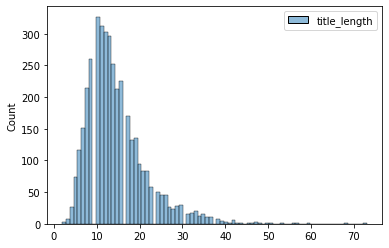

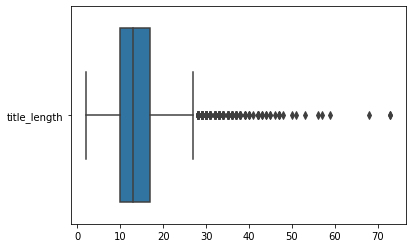

In [25]:
sb.histplot(imdb[["title_length"]])
plt.show()
print()
sb.boxplot(data = imdb[["title_length"]], orient = "h")
plt.show()

it does look like there is a uniform distribution 


let's take a look at the movie that has the longest movie title length 

In [ ]:
imdb.loc[imdb["title_length"] == 73][["movie_title", "imdb_score"]]

|index|movie\_title|imdb\_score|
|---|---|---|
|171|30 Nights of Paranormal Activity with the Devil Inside the Girl with the Dragon Tattoo |2\.6|
|459|Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan |7\.3|

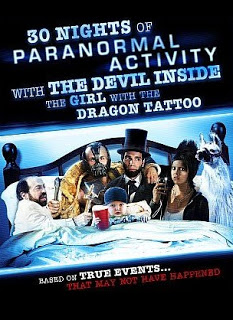

In [40]:
display.Image("https://upload.wikimedia.org/wikipedia/en/6/6a/30_Nights_of_Paranormal_Activity.jpg")

In [21]:
imdb[["title_length"]].skew()

title_length    1.782562
dtype: float64

In [53]:
def f(row):
    if row['imdb_score'] >= 6.6:
        rating = "good"
    else:
        rating = "bad"
    return rating

In [55]:
imdb["imdb_goodbad"] = imdb.apply(f , 1)
imdb.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,title_length,imdb_goodbad
0,4078,Color,David Raynr,16.0,94.0,9.0,200.0,Deon Richmond,927.0,9016377.0,...,USA,R,NaN,1999.0,209.0,5.2,1.85,143,9,bad
1,2150,Color,Colin Higgins,11.0,114.0,19.0,842.0,Barry Corbin,1000.0,69700000.0,...,USA,R,35000000.0,1982.0,883.0,5.8,2.35,0,31,bad
2,4790,Color,Eric England,15.0,81.0,15.0,93.0,Ace Marrero,847.0,NaN,...,USA,NaN,NaN,2013.0,94.0,4.1,16.00,61,9,bad
3,4841,Color,Babar Ahmed,8.0,90.0,0.0,32.0,Alexander Wraith,502.0,NaN,...,USA,PG-13,350000.0,2009.0,119.0,3.2,NaN,53,10,bad
4,4823,Color,Paul Fierlinger,51.0,83.0,3.0,258.0,Peter Gerety,812.0,246574.0,...,USA,NaN,NaN,2009.0,277.0,6.9,1.85,675,11,good


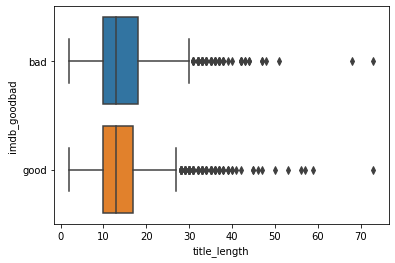

In [57]:
sb.boxplot(data = imdb, x = "title_length", y = "imdb_goodbad")

In [59]:
imdb_bins = [1,3,5,7,10]
imdb_labels = ["horrendous", "bad", "ok", "good"]
imdb['score_cat'] = pd.cut(imdb["imdb_score"], \
                                     bins = imdb_bins, labels = imdb_labels)
imdb.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,title_length,imdb_goodbad,score_cat
0,4078,Color,David Raynr,16.0,94.0,9.0,200.0,Deon Richmond,927.0,9016377.0,...,R,NaN,1999.0,209.0,5.2,1.85,143,9,bad,ok
1,2150,Color,Colin Higgins,11.0,114.0,19.0,842.0,Barry Corbin,1000.0,69700000.0,...,R,35000000.0,1982.0,883.0,5.8,2.35,0,31,bad,ok
2,4790,Color,Eric England,15.0,81.0,15.0,93.0,Ace Marrero,847.0,NaN,...,NaN,NaN,2013.0,94.0,4.1,16.00,61,9,bad,bad
3,4841,Color,Babar Ahmed,8.0,90.0,0.0,32.0,Alexander Wraith,502.0,NaN,...,PG-13,350000.0,2009.0,119.0,3.2,NaN,53,10,bad,bad
4,4823,Color,Paul Fierlinger,51.0,83.0,3.0,258.0,Peter Gerety,812.0,246574.0,...,NaN,NaN,2009.0,277.0,6.9,1.85,675,11,good,ok


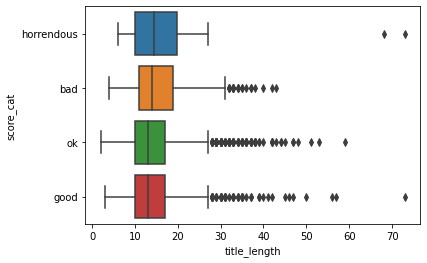

In [63]:
bp = sb.boxplot(data = imdb, x = "title_length", y = "score_cat")

conclusion: it doesn't affect it, but it does seem like "good" has more outliers

# 2. What are the personalities of the directors of the top performing movies ? 

In [ ]:
imdb_sorted = imdb[["title_year","movie_title", "imdb_score", "director_name"]].dropna().sort_values(by = "imdb_score", ascending = False).reset_index()
imdb_sorted.head(n= 20)

In [ ]:
imdb_sorted[["director_name"]].head(n=20)

Based on information online, these are the personalities of the top 20 

|index|director\_name|personality|
|---|---|---|
|0|Frank Darabont| INFP |
|1|Francis Ford Coppola| INTJ |
|2|John Stockwell| INFP |
|3|Christopher Nolan| INTJ |
|4|Francis Ford Coppola| INTJ |
|5|Peter Jackson| ENFJ |
|6|Sergio Leone| NA | 
|7|Steven Spielberg| ISFP |
|8|Quentin Tarantino| ENTP | 
|9|Robert Zemeckis| ENFP | 
|10|David Fincher| INTJ | 
|11|Christopher Nolan| INTJ |
|12|Peter Jackson| ENFP | 
|13|Irvin Kershner| INTP | 
|14|Mitchell Altieri| NA | 
|15|Lana Wachowski| ENFP |
|16|Cary Bell| NA |
|17|Fernando Meirelles| INFP |
|18|Milos Forman| INTP |
|19|Akira Kurosawa| INFJ |

sources : https://www.personality-database.com & https://soulverse.boo.world 




it's interesting to see thatall of them have the "iNtuition" element in their personalities! 

there are more introverts than extroverts too it seems! 

limitations to this observation: could be biased based on their careers, therefore may not be accurately classifying their personalities. 

however though, to reach our conclusion, we will assume that the data is accurate :) 